In [1]:
import numpy as np
from numpy_ringbuffer import RingBuffer

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Digital Frame Synchronization


Header (N=16): [1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1]
Stream (N=80): [0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 0 1]
Correlation peak value: 16 at i=47


<StemContainer object of 3 artists>

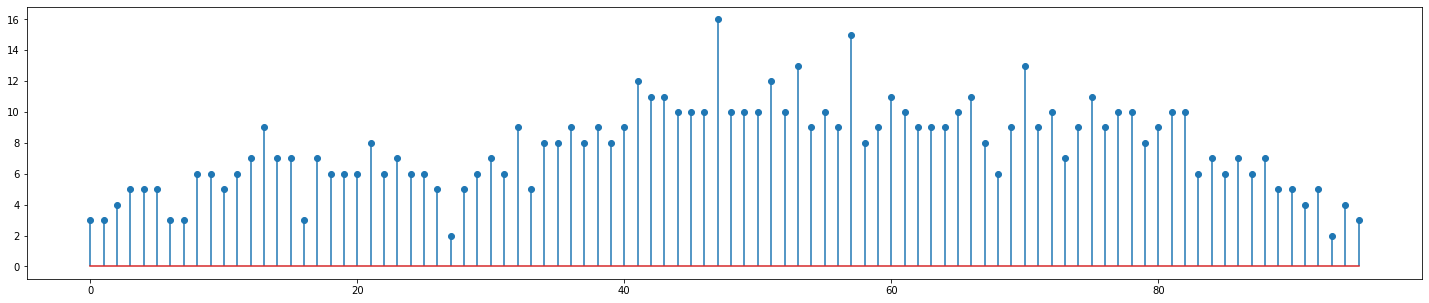

In [27]:
# Create test data
seq = np.unpackbits(np.array([0xbe, 0xef], dtype=np.dtype("uint8")))
stream = np.concatenate([
    np.random.randint(low=0, high=2, size=32), seq, np.random.randint(low=0, high=2, size=32)
])

print(f"Header (N={len(seq)}): {seq}")
print(f"Stream (N={len(stream)}): {stream}")

# Create buffers for cross correlation
fifo = RingBuffer(len(seq), dtype=np.dtype("uint8"))
xcorr = RingBuffer(len(stream) + len(seq), dtype=np.dtype("uint8"))

## fill FIFO with zeros
fifo.extend(np.zeros(fifo.maxlen))

def correlation(v):
    n = len(seq)
    d = np.logical_xor(v, seq) # or bitwise_xor, no difference in this case
    return n - sum(d)
    
for i in range(len(stream) + len(seq) + 1):
    xcorr.append(correlation(np.array(fifo)))
    
    # append stream data
    # if the stream is finished use zeros
    fifo.append(stream[i] if i < len(stream) else 0)

# unwrap values
xc = np.array(xcorr)
# print(f"Cross correlation: {xc}")
print(f"Correlation peak value: {np.amax(xc)} at i={np.argmax(xc)}")

plt.figure(figsize = (25, 5))
plt.stem(xc)